# Objective

Explore the dataset to identify differences between the customers of each product. You can also explore relationships between the different attributes of the customers. You can approach it from any other line of questioning that you feel could be relevant for the business. The idea is to get you comfortable working in Python.

#### Expectation

Come up with a customer profile (characteristics of a customer) of the different products

Perform univariate and multivariate analyses

Generate a set of insights and recommendations that will help the company in targeting new customers.

#### Data Dictionary

The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

Product - The model no. of the treadmill

Age -  Age of the customer in no of years

Gender - Gender of the customer

Education - Education of the customer in no. of years

Marital Status - Marital status of the customer

Usage - Avg. # times the customer wants to use the treadmill every week

Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)

Income - Income of the customer

Miles- Miles that a customer expects to run

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('CardioGoodFitness.csv') # Load dataset from local directory
data.head() # view first 5 rows of the dataset

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
data.tail() # view last 5 rows of the dataset

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [5]:
data.shape # Understand the shape of the dataset 

(180, 9)

There are 180 rows and 9 columns

In [6]:
data.info() # Check the datatypes of the columns of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


- There are 9 columns in the dataset

- 3 columns are of object type and 6 are numerical columns

In [7]:
data.describe().T # Check statistical summary of data

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


#### Observations

- Average age of the customers is 28.8 years which is between 25th and 75th percentile. Customers age ranges from 18 years to 50 years. There is not much differnece between mean and median. There is some difference between 75th percentile and max value which indicates there are some outliers on higher side making the distribution right skewed

- Average education of the customers is 15.6 which is between 25th and 75th percentile. Education ranges between 12 and 21. Mean and median are almost same. There is some difference between 75th percentile and max value which indicates there are some outliers on higher side making the distribution right skewed

- Average Usage is 3.4 which is between 25th and 75th percentile. Usage ranges between 2 and 7. The difference between 75th percentile and max value indicates there are outliers on higher side making the distribution right skewed

- Average Fitness of the customers is 3.3 which is between 25th and 75th percentile. Fitness ranges between 1 and 5.  There is some difference between 75th percentile and max value which indicates there are some outliers on higher side making the distribution right skewed

- Average Income of the customers is 53719 which is between 25th and 75th percentile. Income ranges between 29562 and 104581. There is huge difference between 75th percentile and max value which indicates many outliers on higher side making the distribution right skewed. Standard deviation is too high.

- Average Miles is 103.2. Miles ranges between 21 and 360. There is huge difference between 75th percentile and max value which indicates presence of many outliers on higher side making the distribution right skewed

In [8]:
cat_cols = ['Product', 'Gender', 'MaritalStatus']

for col in cat_cols:
    print(data[col].value_counts()) # prints counts of unique values of category columns
    print("-"*50)

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64
--------------------------------------------------
Male      104
Female     76
Name: Gender, dtype: int64
--------------------------------------------------
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64
--------------------------------------------------


In [9]:
for col in cat_cols:
    print(data[col].value_counts(normalize=True)) # prints percentages of unique values of category columns
    print("-"*50)

TM195    0.444444
TM498    0.333333
TM798    0.222222
Name: Product, dtype: float64
--------------------------------------------------
Male      0.577778
Female    0.422222
Name: Gender, dtype: float64
--------------------------------------------------
Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64
--------------------------------------------------


- Product of model TM195 is bought by 44% of the customers, TM498 is bought by 33% of the customers and TM798 is bought by 22% of the customers

- 57% of the customers are Males and 42% are females

- 59% of the customers are Partnered and 40% are Single

#### Sanity Check

Check for null values and duplicates

In [10]:
data.isnull().sum() # Check for null values

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

There are no null values in the dataset

In [11]:
data.duplicated().sum() # Check for duplicates

0

There are no duplicates in the dataset

# Univariate Analysis

#### Checking Numerical Columns

In [12]:
def histogram_boxplot(data, x_feature, figsize=(10, 5), kde=False, bins=None): # function to combine histogram and boxplot
    """
    Combining Boxplot and histogram which shares single x-axis

    data: dataframe
    x_feature: dataframe column
    figsize: size of figure (default (10,5))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating 2 subplots
    
    sns.boxplot(data=data, x=x_feature, ax=ax_box, showmeans=True, color="violet")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins: # if no.of bins are not None this block gets executed
      sns.histplot(data=data, x=x_feature, kde=kde, ax=ax_hist, bins=bins, palette="winter")
    else: # if no.of bins are None, this block will be executed
      sns.histplot(data=data, x=x_feature, kde=kde, ax=ax_hist)  # For histogram
    
    ax_hist.axvline(data[x_feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist.axvline(data[x_feature].median(), color="black", linestyle="-")  # Add median to the histogram

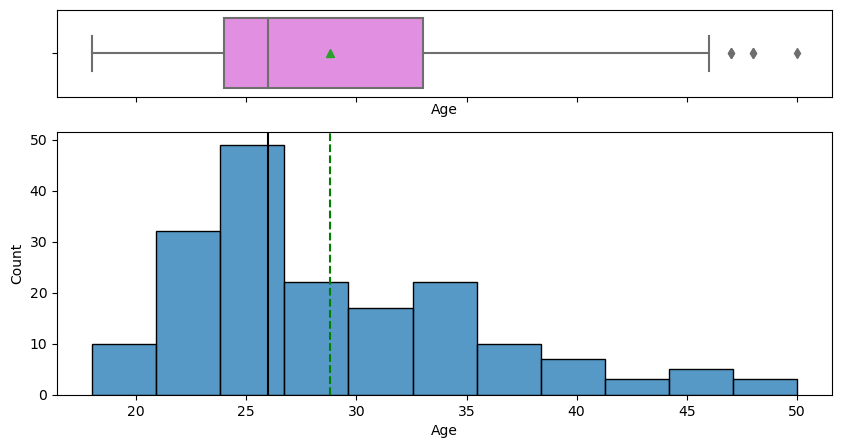

In [13]:
histogram_boxplot(data,'Age')

- The distribution is right skewed

- There are many outliers present in the columns

- Age values above 42 are represented as outliers

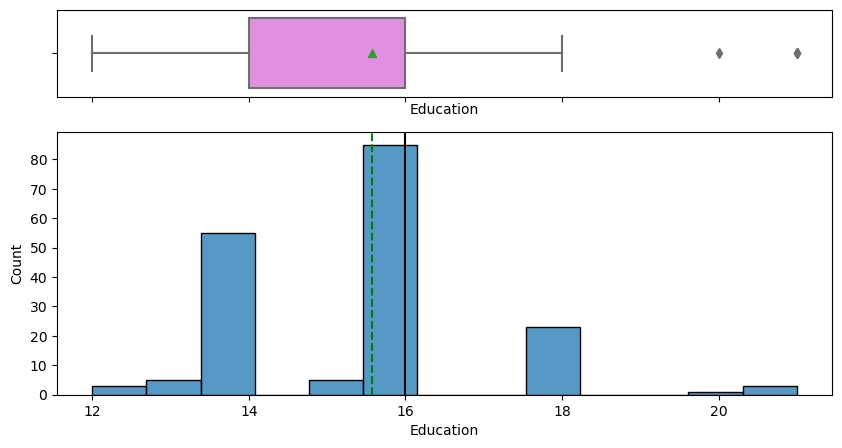

In [14]:
histogram_boxplot(data,'Education')

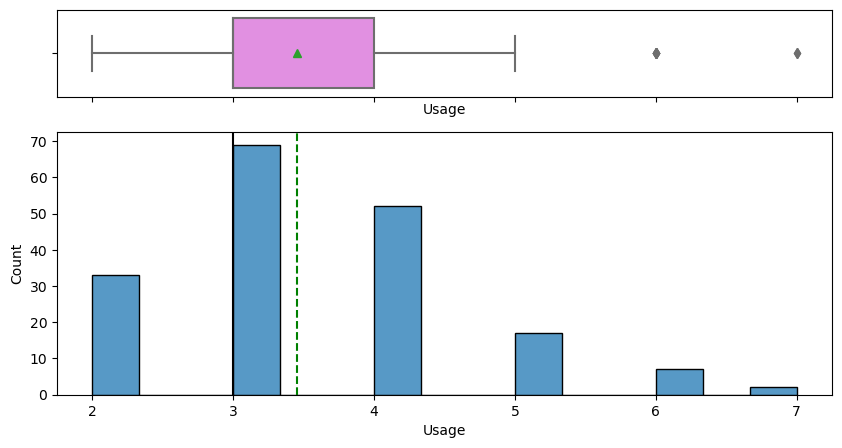

In [15]:
histogram_boxplot(data,'Usage')

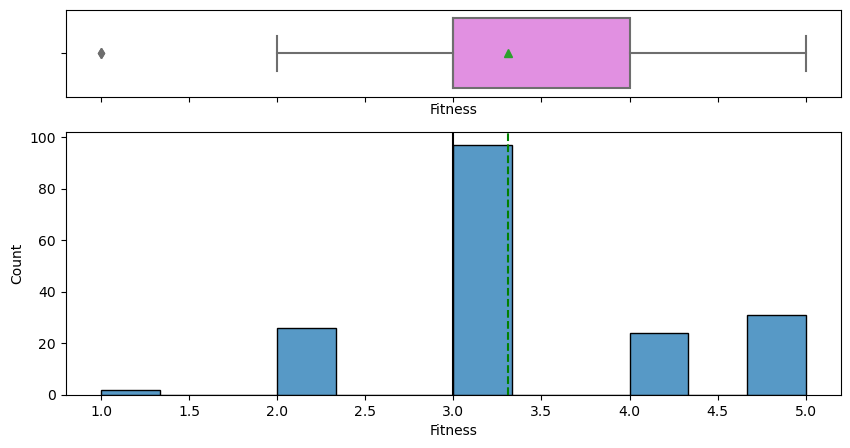

In [16]:
histogram_boxplot(data,'Fitness')

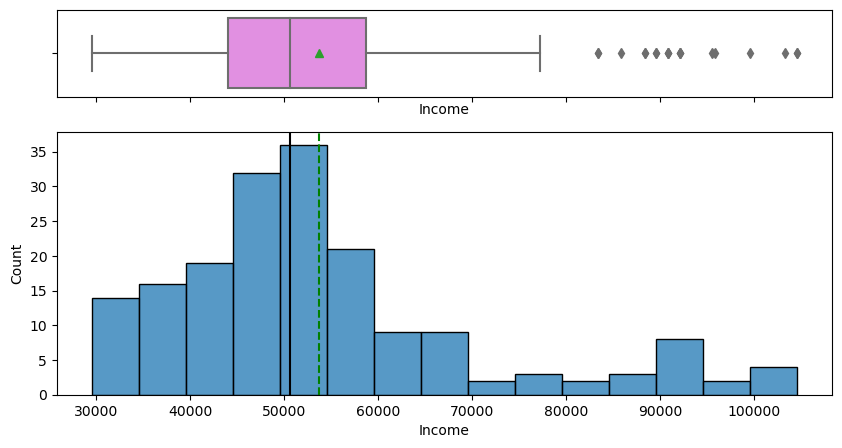

In [17]:
histogram_boxplot(data,'Income')

- The distribution is right skewed

- There are many outliers present in the columns

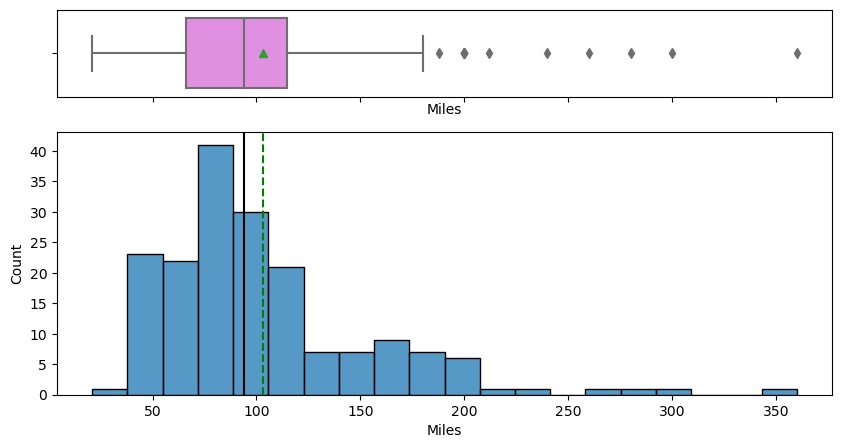

In [18]:
histogram_boxplot(data,'Miles')

- The distribution is right skewed

- There are many outliers present in the columns

#### Checking Categorical Columns

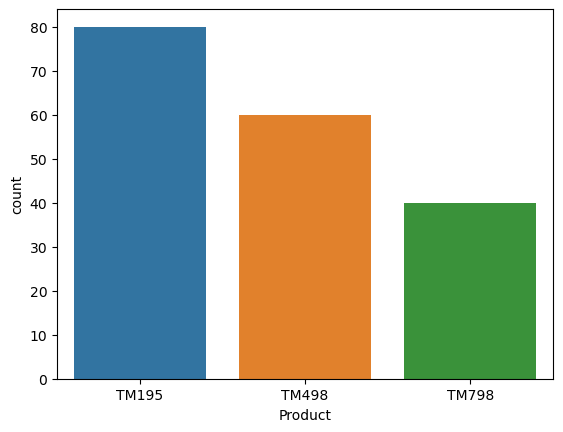

In [19]:
sns.countplot(data=data, x='Product')
plt.show()

- TM195 is most highly used product and TM798 is the least

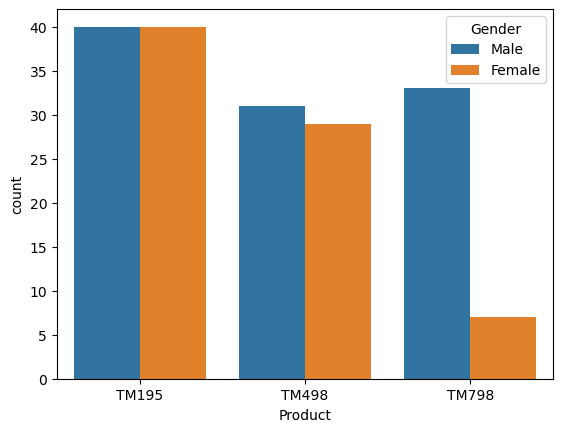

In [20]:
sns.countplot(data=data, x='Product', hue='Gender')
plt.show()

- Count of Male and female Customers who uses TM195 is same

- TM798 have second highest no.of customers but have least no.of female customers among the three product models

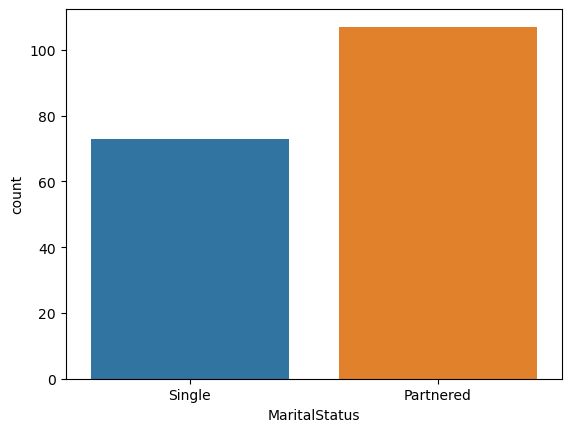

In [21]:
sns.countplot(data=data, x='MaritalStatus')
plt.show()

- Count of Customers with Marital Status Partnered is more when compared to Single customers

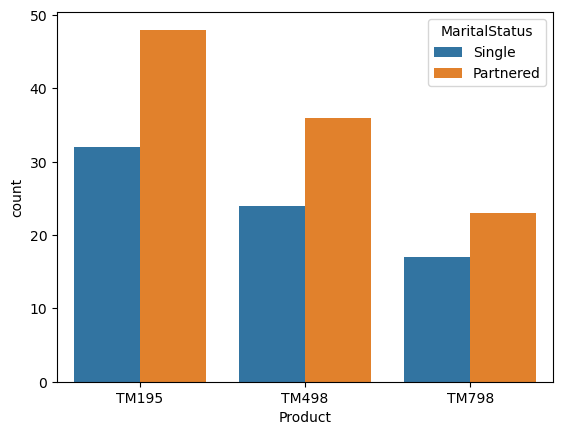

In [22]:
sns.countplot(data=data, x='Product', hue='MaritalStatus')
plt.show()

- Model no. TM195 has highest no.of customers with Marital Status Partnered and Single when compared to other models

#### Bivariate Analysis

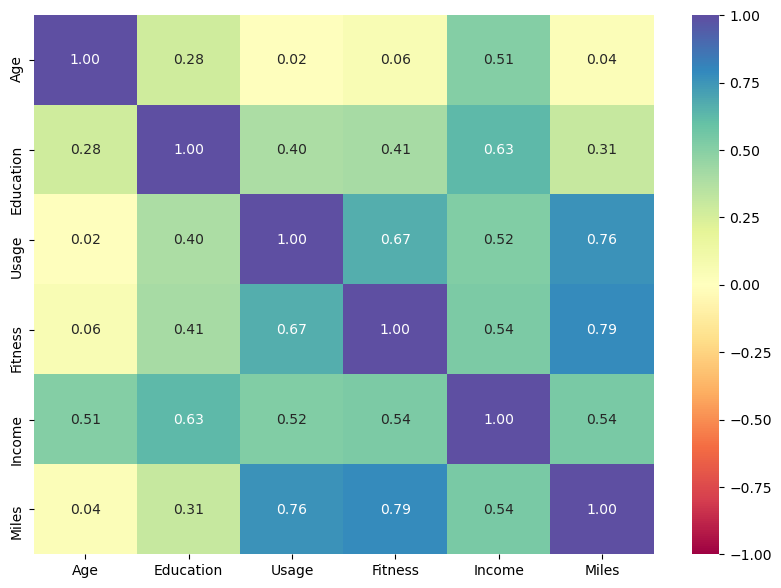

In [44]:
num_cols = ['Age', 'Education','Usage','Fitness','Income','Miles'] # Numerical Columns
corr = data[num_cols].corr() #Correlation of numerical columns

plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral", fmt=".2f") #Generating heatmap for all numerical columns to see the correlation between the columns
plt.show()

#### Observations

- Fitness has high correlation with Miles and Usage and also with Income

- Income has high correlation with Education and some high correlation with Miles, Fitness and Usage

- Age has some high correlation with Income and there is a very weak correlation with Miles, Fitness and Usage variables

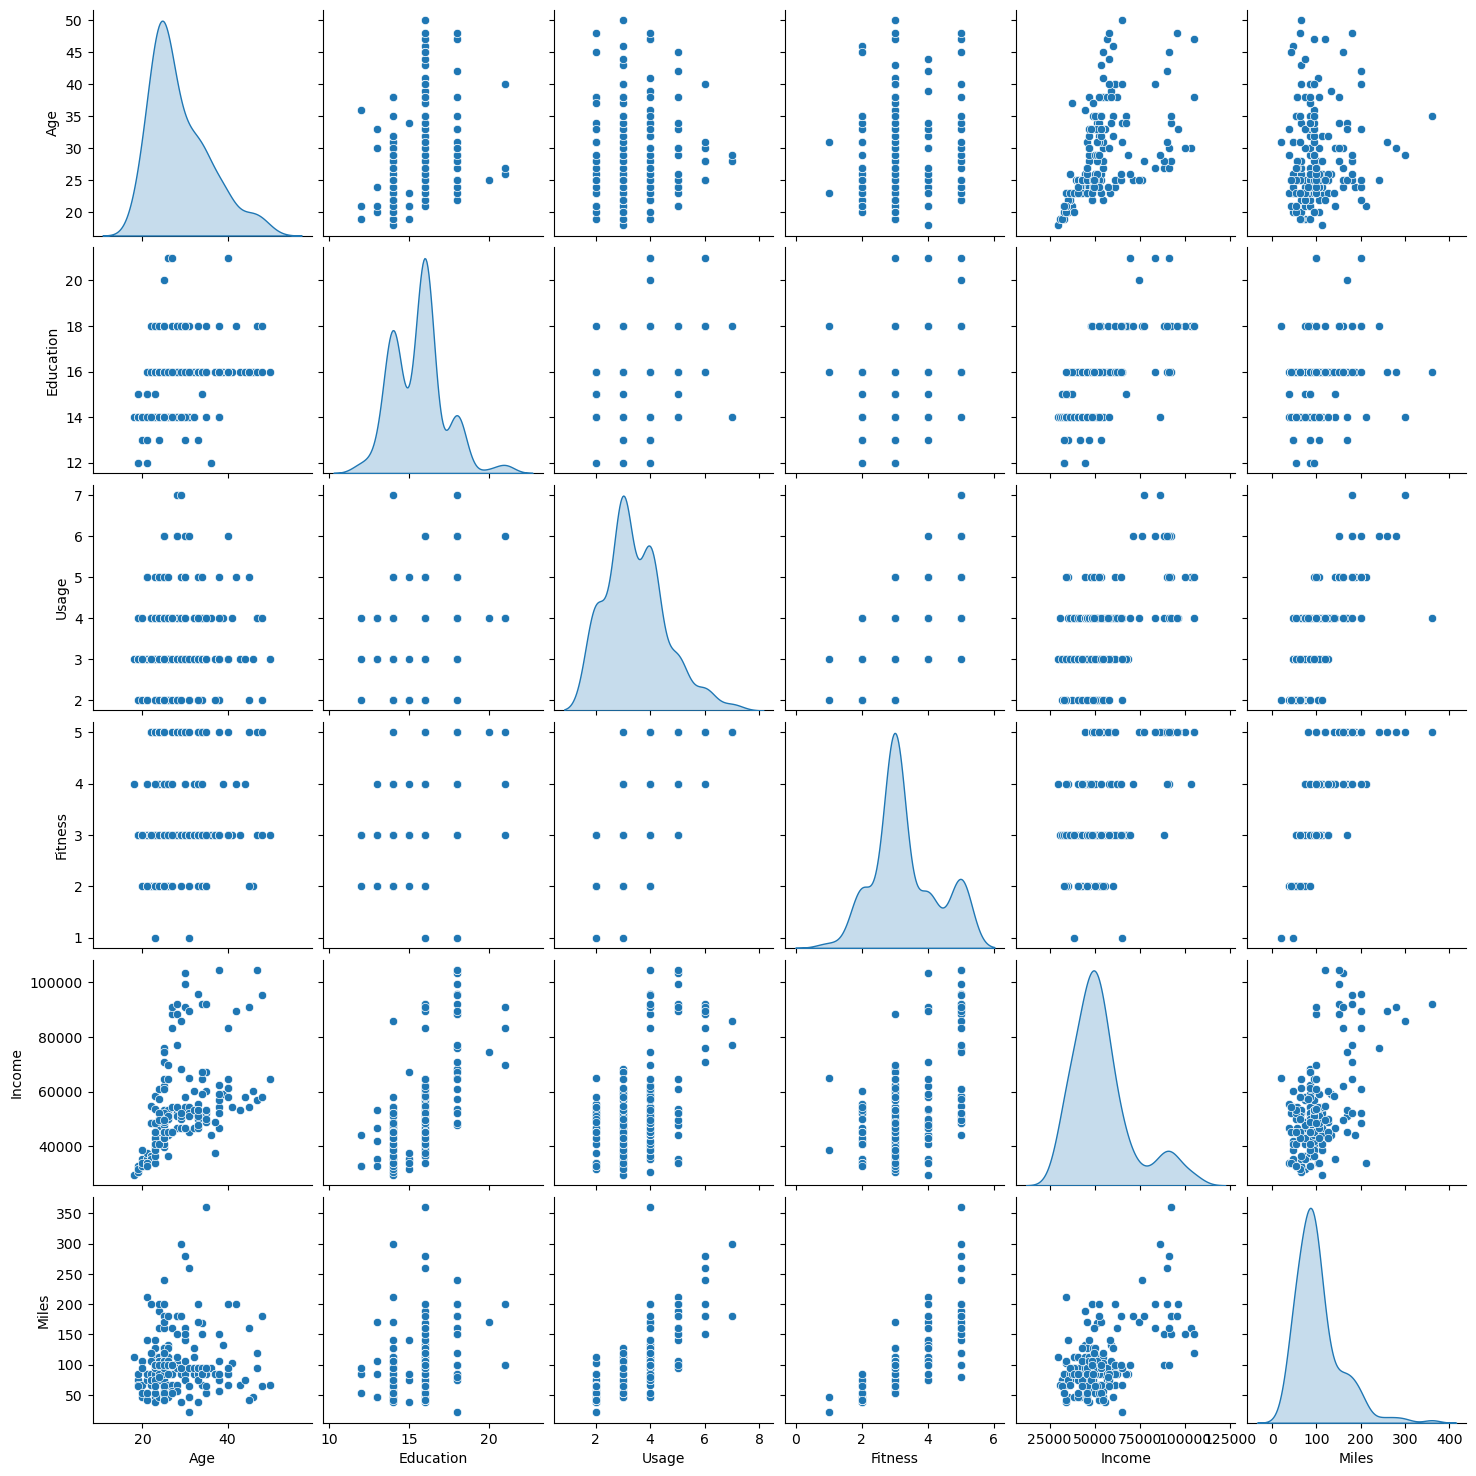

In [45]:
sns.pairplot(data=data[num_cols], diag_kind="kde") # Pairplot helps to understand relationship between numerical columns
plt.show()

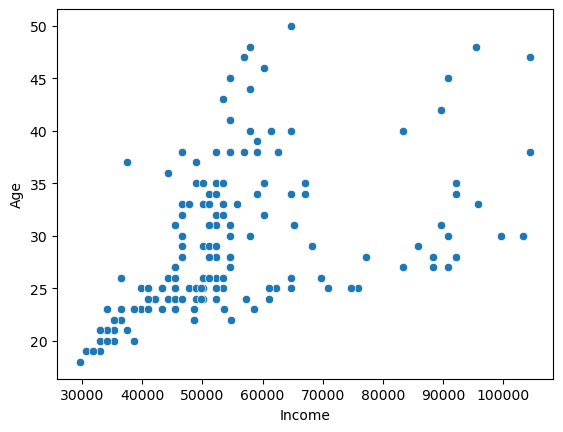

In [25]:
#fitness, miles - lmplot
sns.scatterplot(data=data,x='Income',y='Age')
plt.show()

In [26]:
# Make a copy of the dataframe to add age bins column
df = data.copy()
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [39]:
# Create bins for Age column

df['Age_bins'] = pd.cut(data['Age'],bins=[15,25,35,45,50],labels=['15-25','25-35','35-45', '>45'], right = False)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age_bins
0,TM195,18,Male,14,Single,3,4,29562,112,15-25
1,TM195,19,Male,15,Single,2,3,31836,75,15-25
2,TM195,19,Female,14,Partnered,4,3,30699,66,15-25
3,TM195,19,Male,12,Single,3,3,32973,85,15-25
4,TM195,20,Male,13,Partnered,4,2,35247,47,15-25


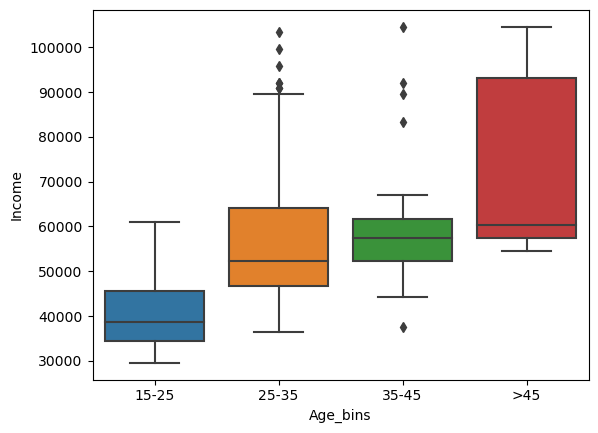

In [28]:
sns.boxplot(data=df,x='Age_bins', y='Income')
plt.show()

<Figure size 1000x500 with 0 Axes>

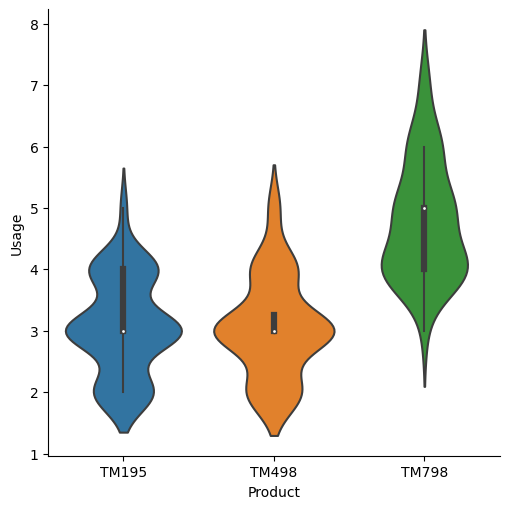

In [29]:
plt.figure(figsize=(10,5))
sns.catplot(data=data,x='Product',y='Usage', kind='violin')
plt.show()

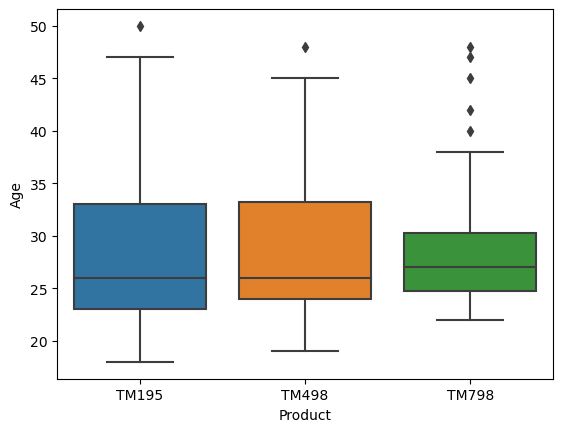

In [30]:
sns.boxplot(data=data, x='Product', y= 'Age')
plt.show()

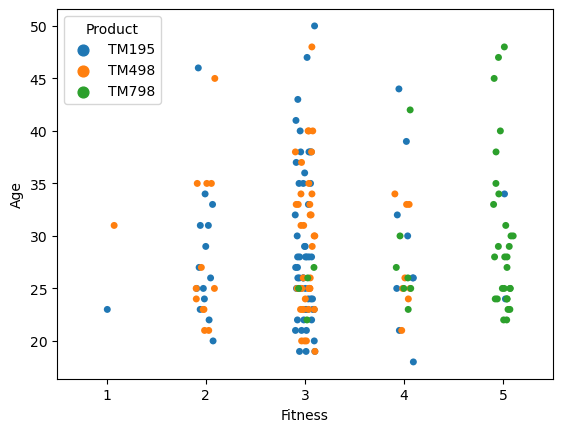

In [46]:
sns.stripplot(data=data, x='Fitness', y='Age', hue='Product') # Stripplot is used here to differentiate the values by Product
plt.show()

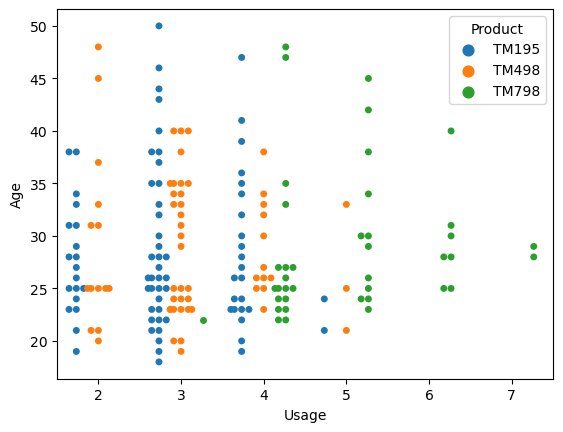

In [47]:
# Inorder to avoid overlapping of points, we are using swarmplot and setting dodge = True for splitting the three products
sns.swarmplot(data=data, x='Usage', y='Age', hue='Product', dodge=True) 
plt.show()

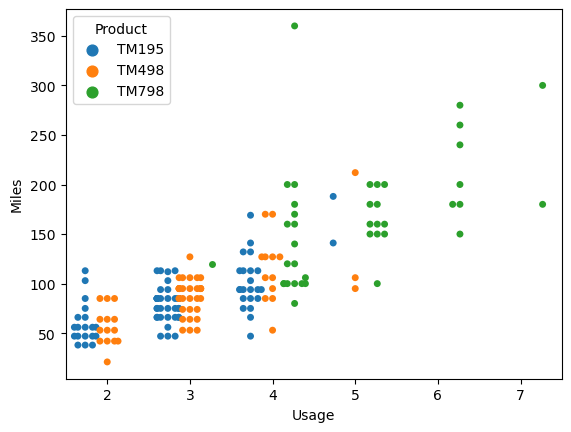

In [33]:
sns.swarmplot(data=data, x='Usage', y='Miles', hue='Product', dodge=True)
plt.show()

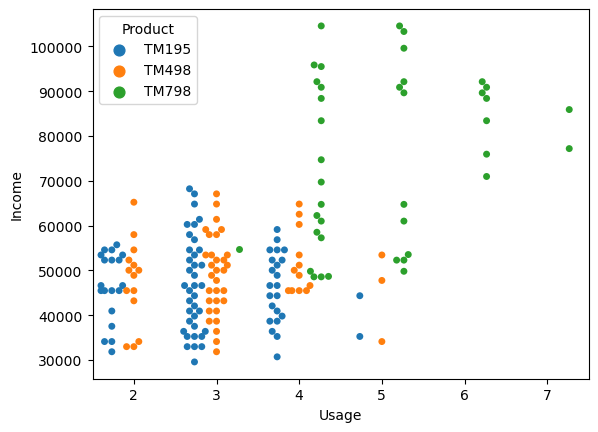

In [34]:
sns.swarmplot(data=data, x='Usage', y='Income', hue='Product', dodge=True)
plt.show()

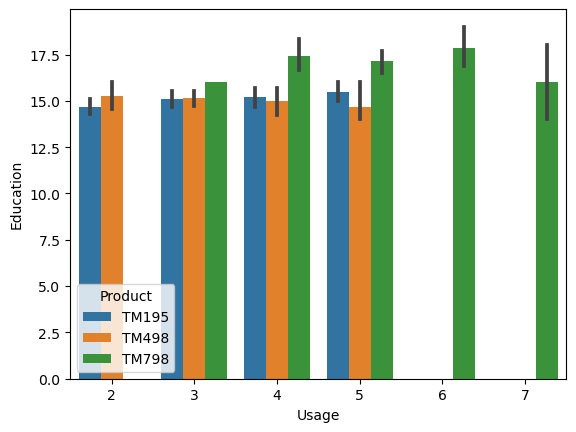

In [51]:
# barplot
sns.barplot(data=data, x='Usage', y='Education', hue='Product')
plt.show()

#### Observations

- Customers who use TM798 are young, more educated and more fit and earn more income when compared to customers of other models

#### Conclusion 

- Product of model TM195 is bought by 44% of the customers, TM498 is bought by 33% of the customers and TM798 is bought by 22% of the customers

- Though TM798 model customers are more fit, TM195 is bought by most of the customers relatively cheaper than other two models

- 75% of the customers are of age less than 33 years

- 57% of the customers are Males and 42% are females

- 59% of the customers are Partnered and 40% are Single

#### Recommendations

- Since there are more male customers than female customers, it is recommended to plan for some kind of promotions espicially to attract female customers.

- It is recommended to target customers of age more than 33 years by having some special promotions

- TM798 product can be promoted as more durable and TM195 can be promoted as cost-effective one.